# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $g(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [1]:
# a) Declarando las funciones
from sympy.interactive import printing
printing.init_printing(use_latex=True)


from sympy import *
import sympy as sym

In [69]:
y = Function('y')  #Ponemos a y como una función
x = Symbol('x') #X es un símbolo

In [7]:
y1 = Eq(y(x), sin(x)) #y1 va a ser la variable que contenga la ecuación
y1

In [8]:
#Repetimos el proceso con z, w y g

z = Function('z')
z1 = Eq(z(x),cos(x))
z1

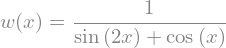

In [10]:
w = Function('w')
wa = cos(x) + sin(2*x)
w1 = Eq(w(x),1/wa)
w1

In [13]:
# b) Obtener la derivada de g

g = Function('g')
g1 = sin(x)*cos(x)
g2 = Eq(g(x),g1)
g2


La derivada es:


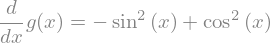

In [15]:
d = Eq(diff(g(x)),diff(g1))   #Es mejor si declaro una nueva variable que tenga la ecuación de la derivada.
print("La derivada es:")
d

In [27]:
import numpy as np

X = list(np.linspace(0,1,100))   #Creamos un espacio lineal entre 0 y 1
Y = [(1/(sin(2*i)+cos(i))) for i in X]   #Cada valor del espacio lineal lo convertimos al valor de w


Text(0, 0.5, 'w(x)')

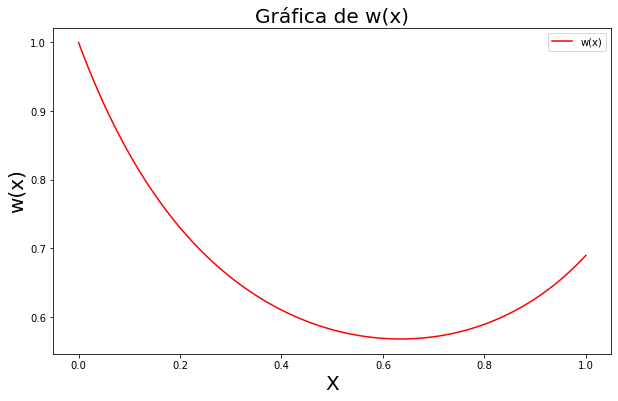

In [39]:
#c) Graficando

import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))   #Tamaño de la figura 
plt.plot(X,Y, label = "w(x)", color='red')   # Ploteo de los datos, con el nombre de la grafica wx y color rojo
plt.legend(loc="best")   # La leyenda en la mejor locación
plt.title("Gráfica de w(x)", fontsize=20) # Titulo de la gráfica
plt.xlabel('X', fontsize = 20) # Etiqueta del eje x 
plt.ylabel('w(x)', fontsize = 20)  #Etiqueta del eje y

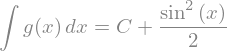

In [42]:
# d) Integrales

inte = integrate(g1,x)  #Con esto estoy integrando la parte derecha de g(x)
intg = integrate(g(x),x)  #Con esto es la integral simbolica de g}x)
c = Symbol("C") #Agrego como simbolo la constante de integración
inte2 = inte + c  #Declaro la integral del lado derecho mas la constante de integración
intf = Eq(intg,inte2)   #Declaro una ecuación que tenga las dos partes de la integral 
intf

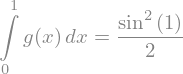

In [51]:
# Análogo al anterior pero con integral definida de cero a uno

intd = integrate(g1,(x,0,1))

intg2 = integrate(g(x),(x,0,1))
intfd = Eq(intg2,simplify(intd))
intfd

In [46]:
# e) Limites

lim1 = limit(sin(x),x,0)   #Calculo el limite del seno de x cuando x tiende a cero
Eq(Limit(y(x),x,0),lim1) #El límite simbólico de y(x)

In [47]:
#Análogo a lo anterior

lim2 = limit(cos(x),x,0)
Eq(Limit(z(x),x,0),lim2)

In [48]:
#Análogo al anterior

lim3 = limit(1/wa,x,0)

Eq(Limit(w(x),x,0),lim3)

In [49]:
lim4 = limit(sin(x)*cos(x),x,0)
Eq(Limit(g(x),x,0),lim4)

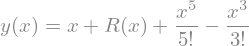

In [53]:
# f) Series de Taylor

#Aquí estoy declarando simbolicamente el polinomio de Mc Laurin de tercer grado para sen(x)

r = Function('R')
tres = Symbol("3!")
cinco = Symbol("5!")
Tay = x - ((x**3)/tres) + ((x**5)/cinco) + r(x)
Eq(y(x),Tay)

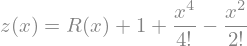

In [55]:

#Aquí estoy declarando simbolicamente el polinomio de Mc Laurin de tercer grado para cos(x)

r = Function('R')
dos = Symbol("2!")
cuatro = Symbol("4!")
Tay2 = 1 - ((x**2)/dos) + ((x**4)/cuatro) + r(x)
Eq(z(x),Tay2)

<div class="alert alert-info">
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [58]:
#La función del método Runge-Kutta

def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [64]:
#Estado innicial
x0 = 0
y0 = 0
z0 = 0


N=1000
from scipy.integrate import odeint

In [76]:
import numpy as np

Y = np.zeros([3])
time = np.linspace(0,25,N)
Y[0] = x0
Y[1] = y0
Y[2] = z0


# La función que describe el sistema.
def atractor(estado, tiempo):
    g0 = - estado[1] - estado[2]
    g1 = estado[0] + 0.13*estado[1]
    g2 = 0.2 + estado[2]*(estado[0]-6.5)
    return np.array([g0,g1,g2])

In [77]:
solución = odeint(func=atractor,y0=Y,t=time)

In [78]:
solución

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.93626085e-05, -5.01841674e-07,  4.61912556e-03],
       [-2.25361486e-04, -3.86586863e-06,  8.54481560e-03],
       ...,
       [ 3.99333542e-02,  1.06241489e-01,  3.10538485e-02],
       [ 3.64812390e-02,  1.07545467e-01,  3.10384859e-02],
       [ 3.29979116e-02,  1.08766770e-01,  3.10229299e-02]])

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

Text(0, 0.5, 'Datos')

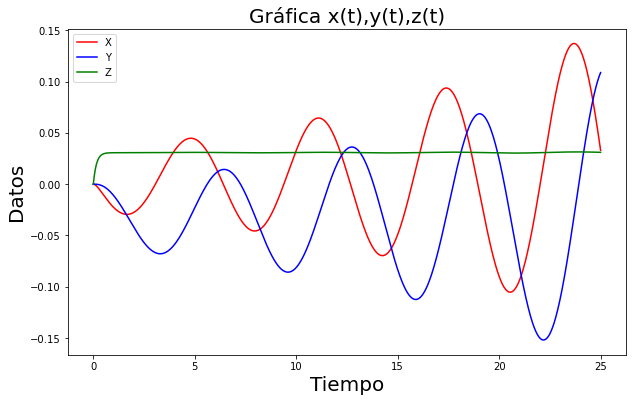

In [86]:
xdata = solución[:,0]
ydata = solución[:,1]
zdata = solución[:,2]

plt.figure(figsize=(10,6))
plt.plot(time,xdata, label = "X", color='red')
plt.plot(time,ydata, label = "Y", color = 'blue')
plt.plot(time,zdata, label = "Z", color = 'green')
plt.legend(loc="best")
plt.title("Gráfica x(t),y(t),z(t)", fontsize=20)
plt.xlabel('Tiempo', fontsize = 20)
plt.ylabel('Datos', fontsize = 20)

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

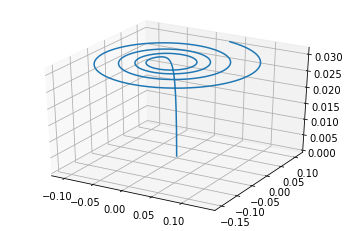

In [91]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
surf = ax.plot(xdata,ydata,zdata)